# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Homework 2 submission</b></u>

### Roster Name: Neeval Kumar
### Preferred Name (if different): Chosen Name
### Student ID: 011877086
### Email address: kumar.neeval@gmail.com
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.
https://realpython.com/train-test-split-python-data/


##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import collections

In [8]:
np.random.seed(42)

#### Beginning with creating our 2D data

In [9]:
n = 100

X1 = np.random.normal(loc = -2, scale = 2, size = int(n/2))
Y1 = np.random.normal(loc = 0, scale = 1, size = int(n/2))

X2 = np.random.normal(loc = 2, scale = 2, size = int(n/2))
Y2 = np.random.normal(loc = 0, scale = 1, size = int(n/2))

X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

dt = pd.DataFrame({'X': X, 'Y':Y}, columns=['X', 'Y'])
dt.head()



,X,Y
0,-1.006572,0.324084
1,-2.276529,-0.385082
2,-0.704623,-0.676922
3,1.046060,0.611676
4,-2.468307,1.031000


#### Divide dataset into training/test


In [10]:
l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1 + l2
print(labels)
X_train, X_test, Y_train, Y_test = train_test_split(dt, labels, test_size=0.2, random_state=0)
print(f"Length of training is {len(X_train)} \nLength of test is {len(X_test)}")


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Length of training is 80 
Length of test is 20


#### Driver code, set up dataframe for reference data, create prediction results and append the result of test dataframe's classification from the training data

In [11]:
train_df = pd.DataFrame(X_train)
train_df["Output Variable"] = Y_train

test_df = pd.DataFrame(X_test)
pred_results = []

for index in test_df.index:
    pred_results.append(knn(test_df.loc[index], train_df,3))

    


In [12]:
print(pred_results)
print(Y_test)

[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]


#### ACTUAL FUNCTION - New observation will represent our new data record to be classified as either 0 or 1. Reference data is our dataset and k = 3 will be the nearest neighbor count to the new observation.

In [13]:
def knn(newObservation, referenceData, k=3):
    if newObservation.size + 1 != referenceData.iloc[0].size:
        raise Exception('newObservation dimensions are not the same as reference Dataset')
    
    
    # Distances will be a dictionary to hold the distances 
    # and it's output variable, label counts for how many neighbors are in majority
    distances = {}
    label0_count = 0
    label1_count = 0
    point2 = []
    
    for x in newObservation:
        point2.append(x)
     
    
    #Loop through reference data and find distance between every observation in referenceData and our newObservation
    # Store the result in distances
    for index in referenceData.index:
        row = referenceData.loc[index]
        point1 = []
        
        for x in range(row.size-1):
            point1.append(row[x])
        
        point1 = np.array(point1)
        point2 = np.array(point2)
        distance = np.linalg.norm(point1 - point2)
        distances[distance] = referenceData['Output Variable'][index]
        
    # Sort the distances dictionary based on key (which is the distance), and then retreive the first 3 values
    # which are the labels. Count the number of labels and return accordingly
    i = 0
    for value in sorted (distances): 
        if i == k:
            break
        output_variable = distances[value]
        i += 1
        if output_variable == 0:
            label0_count += 1
        else:
            label1_count += 1
            
                            
        
    if label0_count < label1_count:
        return 1
    else:
        return 0
            
    

#### Print Accuracy score between y test and prediction results and then plot

Accuracy Score is: 0.9


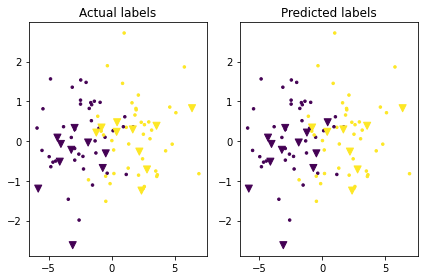

In [14]:
print(f'Accuracy Score is: {float(accuracy_score(pred_results, Y_test))}')
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=pred_results, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()

#### Now onto 3D data, same process

In [15]:
n = 1000
X1 = np.random.normal(loc = 0, scale = 3, size = int(n/4))
Y1 = np.random.normal(loc = -3, scale = 1, size = int(n/4))
Z1 = np.random.normal(loc = -1, scale = 1, size = int(n/4))

X2 = np.random.normal(loc = 0, scale = 3, size = int(n/4))
Y2 = np.random.normal(loc = 1, scale = 2, size = int(n/4))
Z2 = np.random.normal(loc = 1, scale = 1, size = int(n/4))

X3 = np.random.normal(loc = 0, scale = 3, size = int(n/4))
Y3 = np.random.normal(loc = 3, scale = 1, size = int(n/4))
Z3 = np.random.normal(loc = 4, scale = 1, size = int(n/4))

X4 = np.random.normal(loc = 0, scale = 3, size = int(n/4))
Y4 = np.random.normal(loc = 5, scale = 3, size = int(n/4))
Z4 = np.random.normal(loc = -3, scale = 1, size = int(n/4))

X = np.concatenate((X1, X2, X3, X4), axis=0)
Y = np.concatenate((Y1, Y2, Y3, Y4), axis=0)
Z = np.concatenate((Z1, Z2, Z3, Z4), axis=0)

three_dt = pd.DataFrame({'X': X, 'Y':Y, 'Z': Z}, columns=['X', 'Y', 'Z'])

In [16]:
l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1+l2
X_train, X_test, Y_train, Y_test = train_test_split(three_dt, labels, test_size=0.2, random_state=0)
train_df = pd.DataFrame(X_train)
train_df["Output Variable"] = Y_train

test_df = pd.DataFrame(X_test)
pred_results = []

for index in test_df.index:
    pred_results.append(knn(test_df.loc[index], train_df,3))
    
print(pred_results)
print(Y_test)



[1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0]
[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,

Accuracy Score is: 0.945


Text(0.5, 1.0, 'Predicted labels')

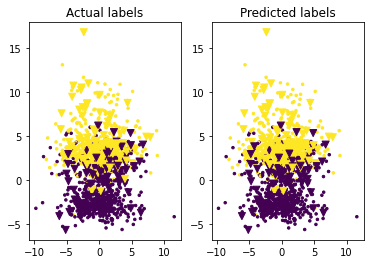

In [17]:
print(f'Accuracy Score is: {float(accuracy_score(pred_results, Y_test))}')
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=pred_results, marker="v")
plt.title("Predicted labels")